# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Data Loading and Exploration

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
# Displaying the first few rows of the dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [4]:
# Displaying the shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (418, 12)


In [5]:
# Statistical summary of the dataset
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [6]:
# Checking for missing values
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Data Preprocessing

In [7]:
# Filling missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [8]:
# Mapping categorical variables to numerical values
df['Embarked'] = df['Embarked'].map({'Q': 0, 'S': 1, 'C': 2}).astype(int)
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0}).astype(int)

In [9]:
# Converting data types
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

# Dropping columns that are not needed for the model
df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1, inplace=True)

In [10]:
# Displaying the first few rows after preprocessing
print(df.head())

   Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked
0         0       3    0   34      0      0     7         0
1         1       3    1   47      1      0     7         1
2         0       2    0   62      0      0     9         0
3         0       3    0   27      0      0     8         1
4         1       3    1   22      1      1    12         1


# Feature Engineering

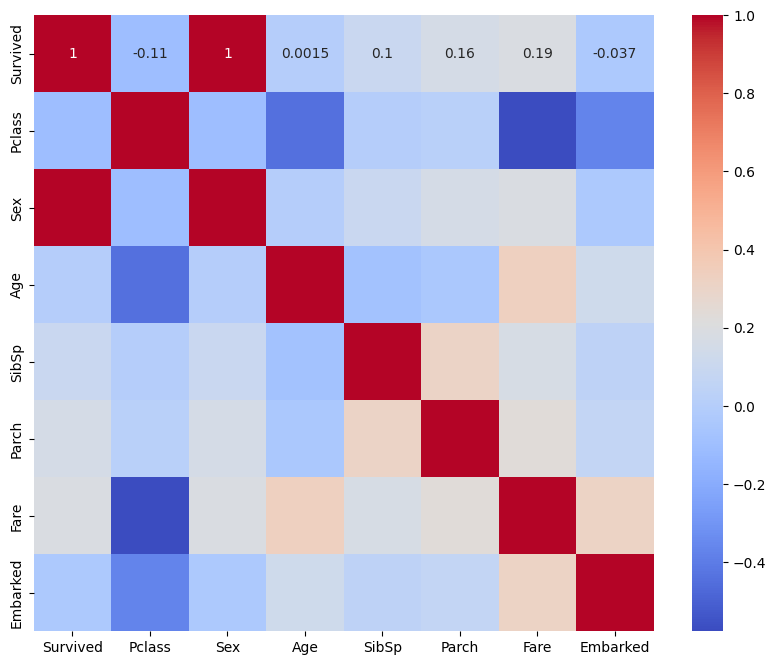

In [11]:
# Correlation matrix
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [12]:
print("Correlation with Survived:")
print(correlation['Survived'].sort_values(ascending=False))

Correlation with Survived:
Survived    1.000000
Sex         1.000000
Fare        0.191156
Parch       0.159120
SibSp       0.099943
Age         0.001538
Embarked   -0.037432
Pclass     -0.108615
Name: Survived, dtype: float64


# Data Visualization

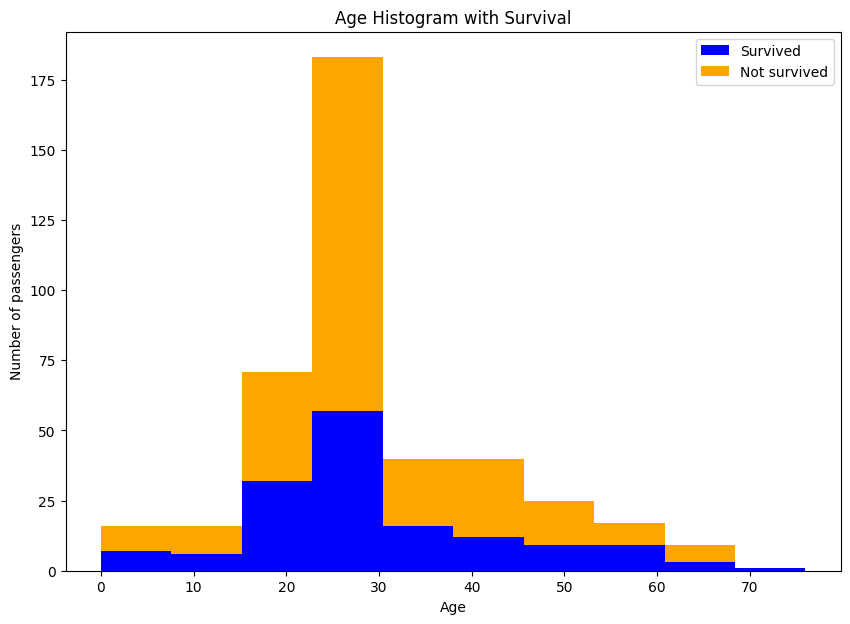

In [13]:
# Histogram for Age with Survival
fig = plt.figure(figsize=(10, 7))
plt.hist([df[df['Survived'] == 1]['Age'], df[df['Survived'] == 0]['Age']],
         stacked=True, color=['blue', 'orange'], label=['Survived', 'Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

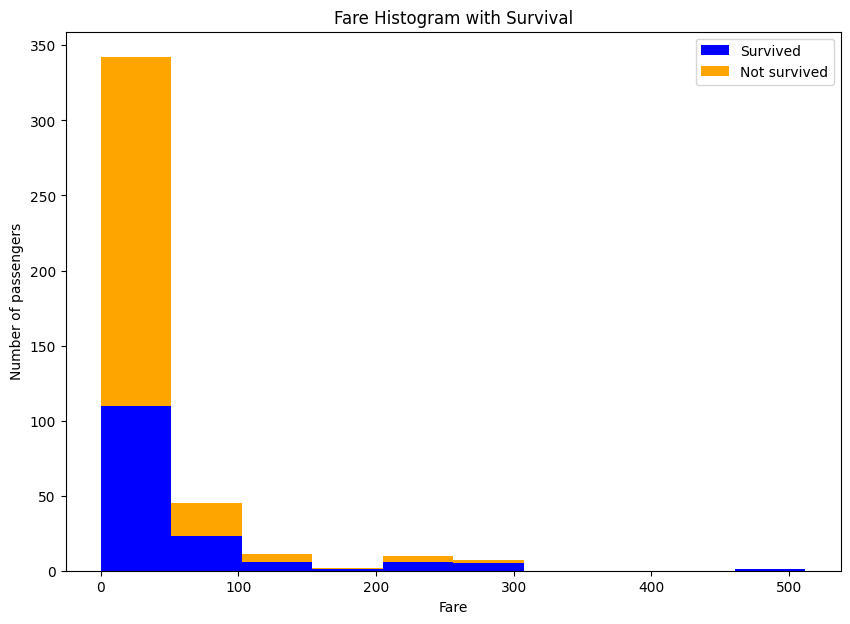

In [14]:
# Histogram for Fare with Survival
fig = plt.figure(figsize=(10, 7))
plt.hist([df[df['Survived'] == 1]['Fare'], df[df['Survived'] == 0]['Fare']],
         stacked=True, color=['blue', 'orange'], label=['Survived', 'Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()

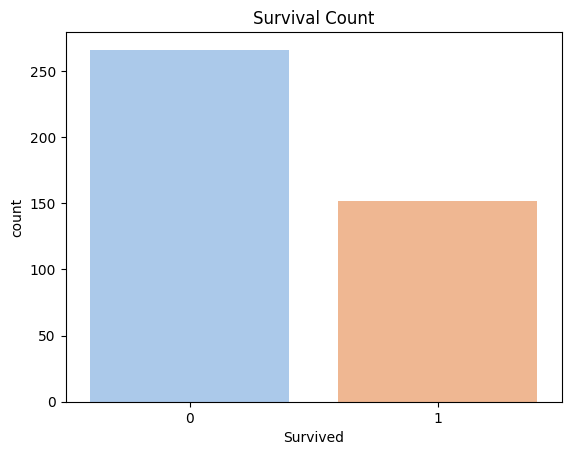

In [15]:
# Countplot for Survival
sns.countplot(data=df, x='Survived', palette='pastel')
plt.title('Survival Count')
plt.show()

# Model Building

In [16]:
# Splitting the dataset into training and testing sets
X = df.drop(['Survived'], axis=1)
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Logistic Regression
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)

# Evaluation

In [17]:
# Evaluation
LRAcc = accuracy_score(y_pred, y_test)
print(f'Logistic Regression Accuracy: {LRAcc * 100:.2f}%')

Logistic Regression Accuracy: 100.00%


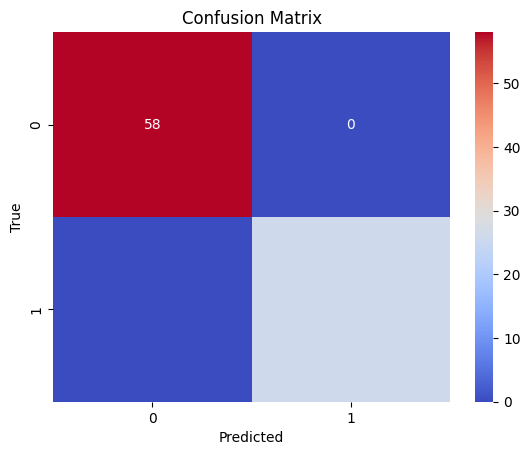

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()